In [1]:
import util
from IPython.display import HTML, Image, display
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/msds2022/casoriano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/msds2022/casoriano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


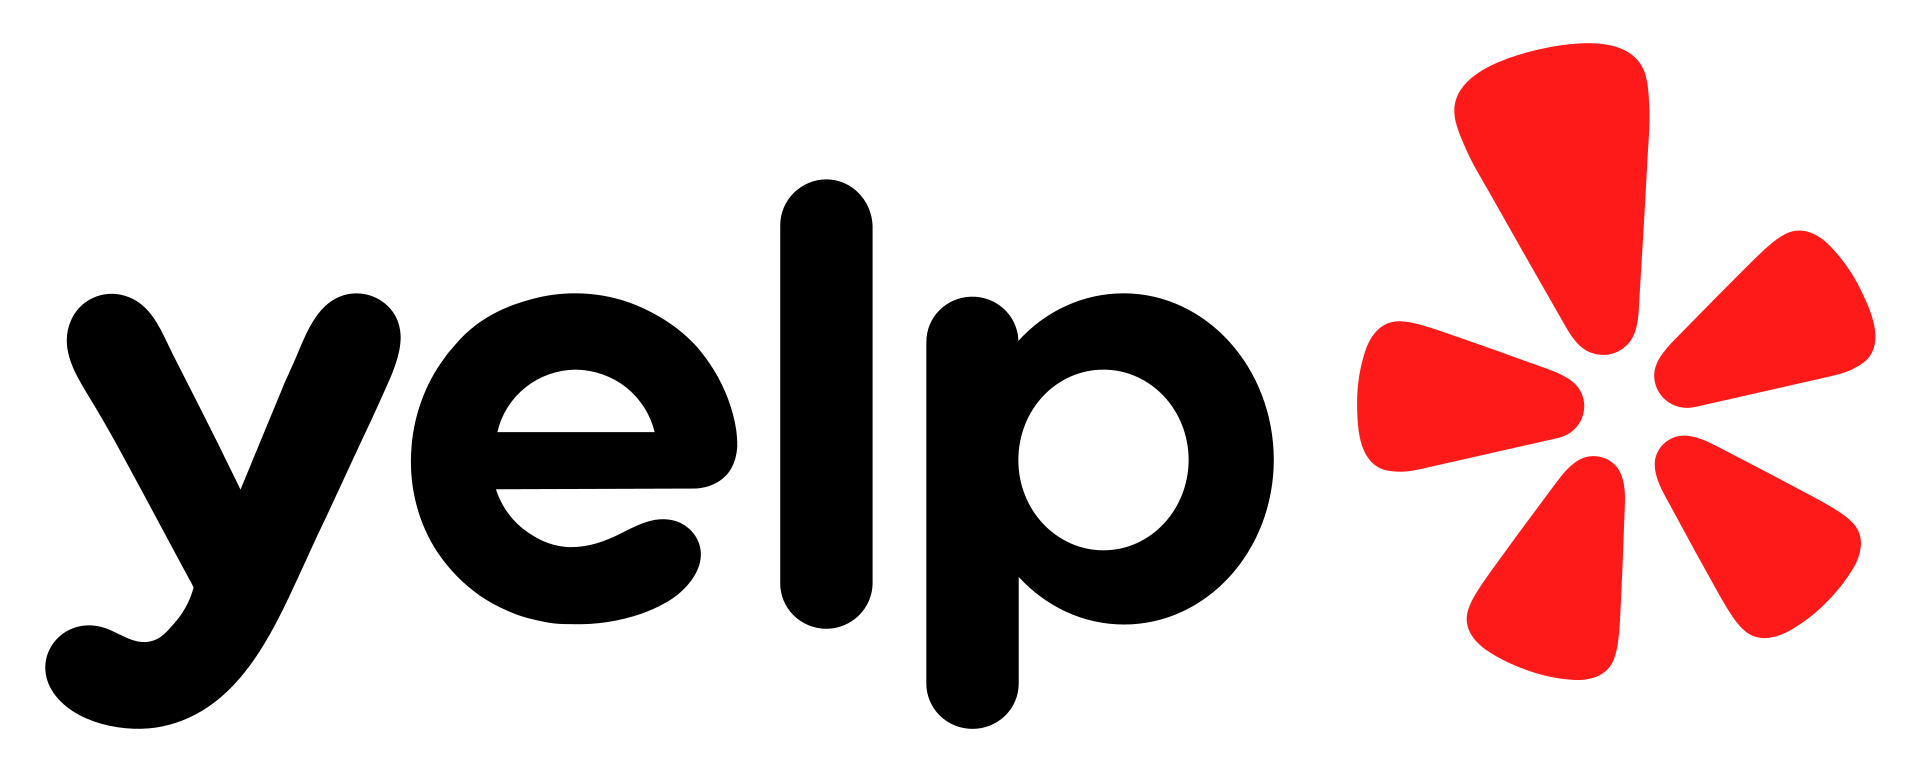

In [36]:
util.Image('img/Yelp_Logo.png')

# **Yelp Me!**
### Topic Modeling Using Positive and Negative Customer Reviews

## 1. Executive Summary

<p style='text-align: justify;'> Small businesses tend to have it hard in the digital age. With the proliferation of social media and review platforms, there is an abundance of customer reviews that a typical business owner cannot handle. Which reviews should they focus on? And which ones should be ignored? How can a small business owner keep up with the influx of information while keeping the business afloat?</p>

<p style='text-align: justify;'>We intend to answer these questions through Latent Semantic Analysis (LSA). Through LSA, we hope we will be able to understand the underlying characteristics of customer reviews. We utilized the Yelp website as the source of our data as it has accumulated millions of reviews since its inception in 2004. However, our study focuses on reviews made in 2017 alone while also excluding neutral reviews (which have a star rating of 3). As such, we will be using two subsets of the Yelp customer review data, positive (more than a star rating of 3) and negative (less than a star rating of 3).</p>

<p style='text-align: justify;'>Our methodology applied significant preprocessing which entailed 1) removing punctuations and symbols, 2) using a corpus of stop words from the NLTK library, and 3) implementing lemmatization using the same library. We then tokenize each row of text to create the Term Frequency-Inverse Document Frequency (TF-IDF) matrix, or the document term matrix. We then employ LSA to decompose the TF-IDF into latent topics which will be the basis of clustering each review.</p>

<p style='text-align: justify;'>As we clustered the reviews, we saw unique themes for both subsets. Positive reviews tend to focus on food and quality of service. In addition, we see a cluster where it only focuses on customers recommending the business. Curiously, we also found a cluster solely for nail salons. On the other hand, negative review clusters tend to be the opposite for both restaurants and service-based businesses. However, a unique cluster for car maintenance was found in negative customer reviews.</p>



## 2. Introduction

<p style='text-align: justify;'>Yelp is a crowd-sourced business review platform founded in 2004 by former Paypal employees Jeremy Stoppelman and Russel Simmons. It is a website and mobile app where users can discover, transact, and most importantly, review local US businesses. With a net revenue of $257 million in the second quarter of 2021 and installed in over 31 million unique devices, it is the 4th largest review platform next to Google, Facebook and Amazon. The top business categories present in Yelp are home and local services, restaurants, and retail shops which comprise more than 50%. [1][2]</p>

<p style='text-align: justify;'>With most of its revenue coming from advertisements, Yelp relies on the sheer amount of customer reviews to generate website and app traffic and in turn make a profit. Highly reliant on advertisement revenue, it has acquired several businesses that complement their business model. In 2013, the platform acquired SeatMe that enabled businesses to manage bookings and other front-office operations. Today it has been rebranded as Yelp Reservations. Nowait was a similar application that catered to restaurants that managed customer reservations. It was acquired by Yelp in 2017 and is now Yelp Waitlist. [3][4]</p>

<p style='text-align: justify;'>To further support local businesses, Yelp for Business was recently updated to provide increased transparency and insight to business owners’ respective Yelp Business Pages. The platform was designed to increase client revenue with features that optimize leads generation and recommendations to accelerate traffic in the client’s business page. However, it is unclear if it provides a digested account or feedback from customer reviews. [5]</p>

<p style='text-align: justify;'>Despite its expansion to new service segments, Yelp is still centered on propagating an ecosystem for its key target market – small and medium sized businesses. As such, customer reviews will remain a key component of its business model in the future. We hope to further extract additional insight and eventually enhance Yelp’s service to its clients.</p>


## 3. Problem Statement

<p style='text-align: justify;'>In this study, we intend to understand what are the underlying groups (or clusters) of either positive or negative Yelp reviews aided with Latent Semantic Analysis.</p>

## 4. Business Value

<p style='text-align: justify;'>Our objective in undertaking this study is to create value to both the businesses present in the platform and potential customers of these businesses. First, we hope the study can shed light onto the quality of the reviews. Once we identify the most relevant reviews, we may be able to give businesses quantifiable feedback. This could be used as a tool to address critical issues in their operations that may not be apparent in their typical feedback channels (e.g. monthly sales figures, quarterly management KPI reviews, etc.).</p>

<p style='text-align: justify;'>Second, we intend the platform’s visitors to have a meaningful experience. We normally would want to see the most relevant and timely reviews at the top. However, this may not always be the case as the most recent reviews are always placed on top in most review platforms. As we understand Yelp’s reviews, we may be able to rank these reviews for the customer.</p>

<p style='text-align: justify;'>Lastly, once we take a closer look at the behavior of the reviews, we may be able to apply algorithms that could be replicated to other categories of products. Currently, we are casting a broad net in order to see if there are general trends in all of Yelp’s reviews.</p>

## 5. Data Description

In [2]:
# data = util.import_data()

In [6]:
# util.separate_reviews(data) # saves DataFrames to csv as well

<p style='text-align: justify;'>As Yelp is a crowd-sourced business review platform, it has a repository of reviews for businesses from several users. Although most will visit Yelp for reviews of restaurants, there are also reviews for other businesses such as building contractors or locksmiths. However, the Yelp review data does not distinguish these various business types despite the presence of user and business IDs.</p>

<p style='text-align: justify;'>For each row of data, there is text describing the review and a corresponding rating - from 1 Star as the lowest to 5 Stars as the highest. In addition, every review is also designated by other users as either useful, funny, or cool. However, for this study, we will only utilize the text data and rating scores for each row.</p>


<center style="font-size:12px;font-style:default;"><b>Table 1. Yelp Customer Reviews Data Table</b><br>User Reviews of Yelp Business Pages</center>

|Column Name    | Data Type     | Description                                                                           |
|:--------------|:--------------|:--------------------------------------------------------------------------------------|
| review_id     | STRING        | Identification tag for each review                                                    |
| customer_id   | STRING        | Identification tag for each customer                                                  |
| business_id   | STRING        | Identification tag for each business                                                  |
| stars         | INT           | Numerical score of review from user                                                   |
| date          | STRING        | Date when review was made by user                                                     |
| text          | STRING        | Full content of user / customer review for the business page                          |
| useful        | INT           | Number of users in platform that regard the review as `useful`                        |
| cool          | INT           | Number of users in platform that regard the review as `cool`                          |
| funny         | INT           | Number of users in platform that regard the review as `funny`                         |

## 6. Design Limitations

<p style='text-align: justify;'>The dataset contains 5,996,996 reviews. It would be operationally expensive and time-consuming to exhaust all reviews for this study. Thus, design limitations were set in place.</p>

<b>Extreme Ratings</b>

<p style='text-align: justify;'>The scope was limited to only positive and negative reviews defined by star ratings of 4 and 5, and 1 and 2, respectively. It is believed that neutral 3-star reviews will not be valuable in the long run in terms of business value. It would be better to improve on customer pain points in negative reviews and retain behaviors found in positive reviews. Removing three star ratings readily removes more than 10% of the dataset.</p>

<b>Latest Reviews</b>

<p style='text-align: justify;'>The scope also limits the reviews to 2017 data. This is the latest complete year as the 2018 data is incomplete. This ensures biases towards seasonality can be ignored in the dataset such as more reviews during peak seasons in certain industries. In terms of business value, it is also best to use the latest reviews as these would be most relevant to customers visiting Yelp. 2003 reviews may not be as relevant as 2017 reviews say in 2021.</p>

<p style='text-align: justify;'>Setting limitations A and B reduces the data for positive reviews to 809,314 entries and for negative reviews at 278,366, making it more manageable.</p>

<b>Latent Factors</b>

<p style='text-align: justify;'>Only 100 latent factors were set in determining topics. Although it explains less variance, this significantly reduces runtime for singular value decomposition and clustering. Too many topics will also limit their interpretation. For Latent Semantic Analysis, this value is actually recommended in sci-kit learn documentation[6].</p>


## 7. Methodology

<p style='text-align: justify;'>Investigating the topics between positive and negative Yelp reviews entails the following steps: 1) Extracting a subset of the data, 2) Preprocess the corpus, 3) Create a TF-IDF matrix, or document term matrix, 4) Break down the TF-IDF matrix into topics using latent semantic analysis, 5) Extract the topic-encoded data, 6) Cluster the data using the extracted latent factors, and 7) Evaluate the topics and clusters.</p> 

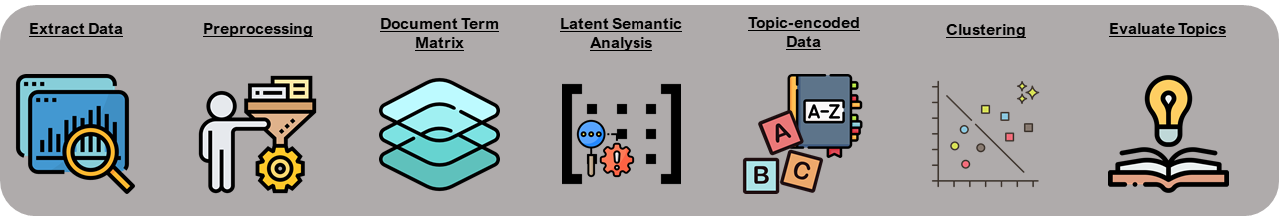

In [39]:
util.Image('img/Diagram_Methodology_Lab4_v2.png')

<center style="font-size:12px;font-style:default;"><b>Figure 1. Overview of Methodology used in this study.</b>

### 7.1 Extract Raw Text Data

We extracted our data from the following path:

`/mnt/data/public/yelp/challenge12/yelp_dataset/yelp_academic_dataset_review.json`

<p style='text-align: justify;'>This a subset of the entire Yelp reviews dataset and we focused on the year 2017 for our analysis. We excluded any 3-Star reviews and centered our attention to opposite ends of the spectrum – positive (more than 3 Stars) and negative (less than 3 Stars).</p>

<p style='text-align: justify;'>From here, we separate the dataset into positive and negative review subsets. We expect the underlying topics and, subsequently, clusters for each subset to be unique and should explain a large proportion of their respective variances. </p>


In [9]:
# # preprocess and saves to pkl files
# docs_pos, docs_neg = util.preprocess_docs(df_pos, df_neg)

# # vectorize docs and save to pkl files
# util.tfidf()

<center style="font-size:12px;font-style:default;"><b>Table 2. Positive Yelp Customer Reviews</b><br>Sample of positive reviews from Yelp users in the year 2017.</center>

In [7]:
display(util.pd.read_csv('positive_2017_reviews.csv',usecols=['text']).tail())

text
809309                                                                                                                                                                                                                                                                                                                                                         I can never be mad at Kung Fu Tea, because I love their product. But this one does not compare to the one on Spring Mountain. I was with a group and we ordered all of our drinks half/less sweet and they tasted like pure sugar. Also, the boba was not nearly as fresh as I've come to expect from the other location. I understand this is probably because they're not busy, but I was still sad about it. Just not the same quality I've come to expect from Kung Fu Tea.
809310                                                                                                                                                                                                                                              I came in with a wedding dress, a budget, and a time limit, and left with what feels like a new friend. \n\nWhen I brought my dress in to get it shortened, Larissa gave me the same price she had quoted me online, with no gimmicks, and had it done within 10 days. When I came back in to pick it up, she greeted me with a smile, chatted with me while I tried it on again, and treated me like I was family. After I paid, she gave me a big hug and wished me well with the big day. Not to mention, she has perfect seam lines and my dress looks AMAZING. \n\nThank you Larissa!
809311                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Good food for moderate prices. I had a custom poke bowl and crab rangoons. The ladies behind the counter were nice. A little odd to keep pest control plug-ins in the seating area though.
809312                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Me and my husband love this place. We go here after getting groceries since we live nearby. The menu is extensive considering it's a relatively new place, and they always do a good job. The rose milk tea is my favorite.
809313  Food: Amazing. I had the Smoked Salmon Benedict and my coworkers had the Pork Belly Benedict and the Chicken Sandwich. The lox and poached egg flavors worked perfectly together and the potato hash was a refreshing alternative to normal breakfast potatoes. I also had the Mexican Hot Chocolate which, while it could have been a little spicier, was delicious with toasted marshmallows on top. \n\nAmbiance/Design: Beautiful. Purple and grey aren't traditional colors for a restaurant, but they work really well here. The layout and lighting worked perfectly for brunch, and they looked like they could work really well during dinner hours too.\n\nService: Attentive and friendly. Our glasses were never empty and food came out pr

<center style="font-size:12px;font-style:default;"><b>Table 3. Negative Yelp Customer Reviews</b><br>Sample of negative reviews from Yelp users in the year 2017.</center>

In [8]:
display(util.pd.read_csv('negative_2017_reviews.csv',usecols=['text']).tail())

text
278361                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             My own personal service was fine but the receptionist was rude to the patient ahead of me and then was venting about the patient to her co-worker in front of all of the other patients in the waiting room. Definitely not a professional environment.
278362  I always thought this bar looked like a really cool place to have a drink. There's a PokéStop and Pokémon gym right outside. It is Tuesday morning, January 3rd 2017. My best friend went inside and asked to use the restroom and said she was going to buy a drink. She asked for a Bloody Mary and bartender named JB said he's not making that tonight. So she asked for a shot of Crown Apple and JB said you need to write to the owner about that because he doesn't have any of that in stock. JB made us feel extremely unwelcome and said he was nervous because we were parked out in front for a few minutes so he called security. We said we were just collecting a PokéStop and decided to check out this bar because it's in our neighborhood. JB said he called security because felt threatened by the car being parked outside with us two females. seriously? \nSo she offered to pay for the drink. JB said it's not necessary. My friend put $20 in the video poker machine and tried to tip him five dollars for the Jack and Coke that she really didn't want and he tossed it back at her. What kind of place is this? I will never, ever come to this bar and I will tell everyone that I know to never come to this bar! Stay away from this bar! Please stay away from this bar. And make sure you definitely don't do Pokémon near here even if you're in the bar. It's not a friendly bar. There are other progressive bars and restaurants that actually welcome people who play Pokémon, but this place does not!\nHe threatened and said that he will call security for any reason. The bar was completely empty at 4:20 in the morning. wow! \nTo the owner, can you please get a bartender that will make a Bloody Mary and can you please order some Crown Apple, because he said to tell you.\nThere are other bars that welcome people who play Pokémon and like to spend money and they will get the business. \nYour bar is completely empty.\nYou may want to think about your bartender.
278363                                                               

### 7.2 Data Preprocessing using Natural Language Processing

Before creating the document term matrix, we first pre-processed the data with the following steps:

1. Removed any unnecessary punctuations and symbols.
2. Converted all words into lowercase.
3. Filtered the data using a corpus of stop words from the NLTK library.
4. Implemented lemmatization using the NLTK library in order to transform words with similar meanings into one root word. 
5. Removed all processed words with less than 2 letters.

This was done to each review in the positive and negative dataset to build the corpus passed on to the vectorizer. The corpus is then saved after.


<center style="font-size:12px;font-style:default;"><b>Table 4. Sample of Preprocessed Positive Reviews</b><br>Sample of preprocessed positive reviews from Yelp users in the year 2017.</center>

In [10]:
with open('corpus_pos.pkl', 'rb') as fp:
        display(util.pickle.load(fp)[:3])

["sansotei serf top notch ramen take reservation company five wait outside half hour guess normal saturday night unlike favorite ramen place nyc order what's menu deviation improvisation whatsoever waitress speak much english even writing everything still managed make mistake two spicy sesame ramen called tan tan exceptional tell right thickness broth taste omg",
 'cool little place nice atmosphere staff great coffee check',
 'finally trying many mexican restaurant thru phoenix scottsdale found authentic mexican restaurant amazing fresh tortilla chip salsa ready waiting table sat food incredible ordered combo beef tamale red sauce chicken enchilada full meat beginning end much flavor highly recommend place']

<center style="font-size:12px;font-style:default;"><b>Table 5. Sample of Preprocessed Negative Reviews</b><br>Sample of preprocessed negative reviews from Yelp users in the year 2017.</center>

In [11]:
with open('corpus_neg.pkl', 'rb') as fp:
        display(util.pickle.load(fp)[:3])

['food alright service horrible order came incorrect waiting extremely long write anything take order asked green end confirmed say grit said green please still ended grit boyfriend whole order came wrong brought back right order pretty sure brought grit took back min wrong order gave waitress came back set plate walked sorry look right need anything else straight nothing never came whole meal check',
 'write review fractured prune first love doughnut second used work bakery know little almighty doughnut past thursday night westgate nice dinner opah life wanted little desert went doughnut shop seemed clean enough made selection took home mistake eaten one would ask money back took bite confirm thought worst doughnut ever horrible sure oil rancid hot enough either way eat risk',
 'wish could tell food problem friend went dinner seated quickly unfortunately middle empty dinning room asked moved side upon sitting told could one small table top two together hostess told manager said use tw

### 7. 3 Document-Term Matrix

<p style='text-align: justify;'>Once preprocessing is done, we then tokenize each row of text to create the Term Frequency-Inverse Document Frequency (TF-IDF) matrix, or the document term matrix. This will allow us to produce the best representation of reviews for clustering as similarity between documents can be easily computed and the vectorizer gives less weight for words appearing in more documents.  This is done for both positive and negative reviews. The sparse matrix and vocabulary are saved for further use.</p>

### 7.4 Latent Semantic Analysis

<p style='text-align: justify;'>Singular Value Decomposition (SVD) decomposes a given matrix into three representative matrices. If SVD is used on vectorized text data, it is known as Latent Semantic Analysis (LSA). We employed LSA to break down the TF-IDF matrix into 100 topics vis-a-vis the individual tokens and rows of text. This is the best way to decompose the TF-IDF matrix as SVD readily handles sparse matrices and topics will be orthogonal to each other. These will be the basis of our clustering rather than directly clustering based on the sparse matrix.</p>

### 7.5 Clustering

<p style='text-align: justify;'>After decomposing the TF-IDF matrix, we first determine which type of clustering is best. kMeans is chosen as the primary method compared to other types of clustering as the least computationally expensive given the size of the dataset. It also has a good range of internal validation procedures used to evaluate the proper number of clusters. With a large number of topics to consider, these checks added more validation in determining the clusters.</p>

<p style='text-align: justify;'>Once the clustering algorithm was chosen, we then chose the number of appropriate clusters to best represent the data using the internal validation criteria for positive and negative reviews. After determining the number of clusters, we moved on to evaluate each cluster.</p>


### 7.6 Evaluate Clusters

<p style='text-align: justify;'>Lastly, we then interpreted each cluster by creating word clouds of reviews of each cluster. Word clouds show sizes of words based on its count in the corpus. This is a good method for quick visual interpretation in the corpus and passes the need to evaluate individual topics.</p>

## 8. Exploratory Data Analysis

### 8.1 Distribution of Data by Time Posted

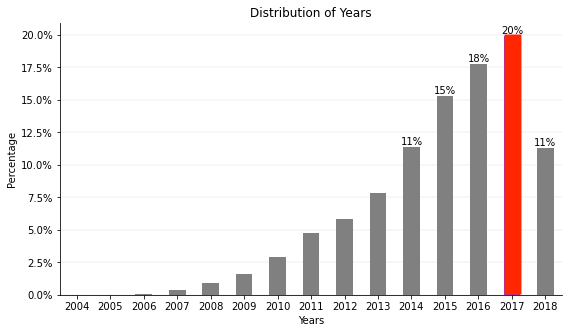

In [3]:
# util.plot_year_dist(data)
util.Image('img/Yearly_Rating_Distribution.png')

<center style="font-size:12px;font-style:default;"><b>Figure 2. The distribution of Yelp reviews over the years.</b><br>Around 20% of the reviews are found in 2017.

<p style='text-align: justify;'>The total dataset provided ran from Yelp’s inception up to 2018. This number is not cumulative. There is an increasing trend on the amount of reviews per year. To provide more relevant reviews to customers, it would be best to use the most recent data gathered.</p>

<p style='text-align: justify;'>Since the 2018 data is not completed up to a year, the next best to use is the 2017 data. It would be best to use up to n years of data such as that within the decade, but due to the large volume of the dataset and the computational cost of running vectorizers, it would suffice to use 2017 data.</p>


### 8.2 Distribution of Data by Rating

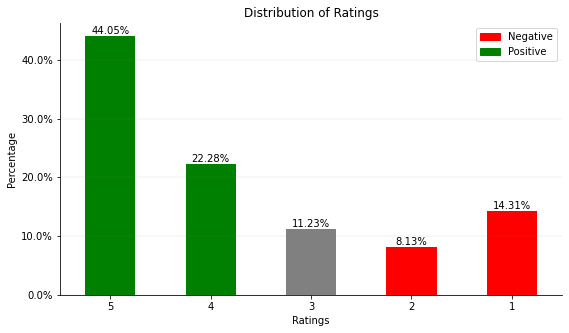

In [4]:
# util.plot_ratings_dist(data)
util.Image('img/Ratings_Distribution.png')

<center style="font-size:12px;font-style:default;"><b>Figure 3. The distribution of total Yelp review ratings.</b><br>Ratings are skewed towards positive reviews.


<p style='text-align: justify;'>The distribution of customer reviews is skewed towards positive with around 66.3% of reviews having 4 or 5 Stars. Due to the dataset being imbalanced, performing Latent Semantic Analysis would be best done by separating negative and positive reviews. In this way, the TF-IDF metric will not be biased towards words in negative reviews given that the Inverse Document Frequency is measured by the scarcity in documents.</p>

<p style='text-align: justify;'>In this study, 4 and 5 star ratings are grouped to form positive reviews, and 1 and 2 star ratings are grouped to form negative reviews. 3 star ratings are removed as they are deemed to be neutral and may not provide as much information as the extremes. Dropping 3 star ratings also reduces our data and saves on computational capacity.</p>

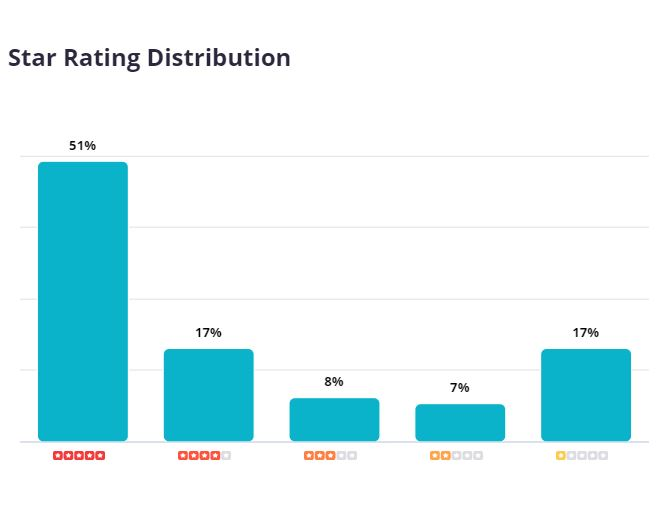

In [5]:
util.Image('Yelp_Ratings.JPG')

<center style="font-size:12px;font-style:default;"><b>Figure 4. The distribution of Yelp review ratings taken from the official Yelp website.</b><br>The sample data roughly follows this distribution.



<p style='text-align: justify;'>Based on the publicly available image on Yelp’s statistics, the distribution of the dataset roughly follows this trend. It can be said that this would produce an accurate representation of the dataset. Further testing of goodness-of-fit could be done to see if the sample dataset distribution follows the distribution released by Yelp.</p>

### 8.3 Cumulative Variance Explained for Positive and Negative Reviews

<p style='text-align: justify;'>Upon performing Latent Semantic Analysis for each group, we get the cumulative variance explained by the singular vectors. For the positive reviews, 458 components are needed to explain at least 90% of the data. For the negative reviews,  609 components are needed to explain at least 90% of the data.</p>

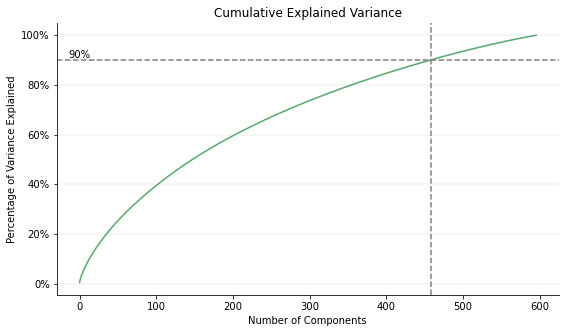

In [12]:
# svd_pos, lsa_pos = util.lsa_100_pos()
# util.plot_var_explained(svd_pos)
util.Image('img/Var_Exp_pos.jpg')

<center style="font-size:12px;font-style:default;"><b>Figure 5. Cumulative variance explained for positive reviews.</b><br>For the positive reviews, 458 components are needed to explain at least 90% of the data.

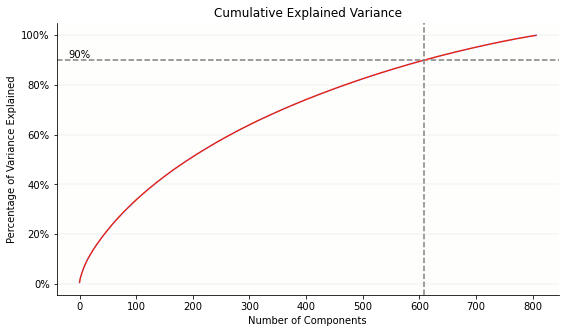

In [13]:
# svd_neg, lsa_neg = util.lsa_100_neg()
# util.plot_var_explained(svd_neg)
util.Image('img/Var_Exp_neg.png')

<center style="font-size:12px;font-style:default;"><b>Figure 6. Cumulative variance explained for negative reviews.</b><br>For the negative reviews,  609 components are needed to explain at least 90% of the data.

<p style='text-align: justify;'>We see that there is less variance in negative reviews thus needing more components. The difference in variations can be attributed to the size difference of the positive and negative groups. With everything else held constant, a smaller dataset has less variation compared to a large dataset.</p>

<p style='text-align: justify;'>It is also possible that the lower variance can be attributed to the removal of stop words and contractions as we expect negative reviews to have more negative adverbs.</p>


### 8.4 Document Topic Matrix Plotted

<p style='text-align: justify;'>The scatter plot below shows the customer reviews plotted against the first and second singular vectors. LSA decomposition shows that the blurb roughly forms triangular-shaped clusters where the origin starts at the axis of the second singular vector. The behavior of these plots are shared by both positive and negative customer reviews, but this is more distinct with the negative reviews. However, we may see a more distinct behavior for both subsets if additional data points are included.</p>

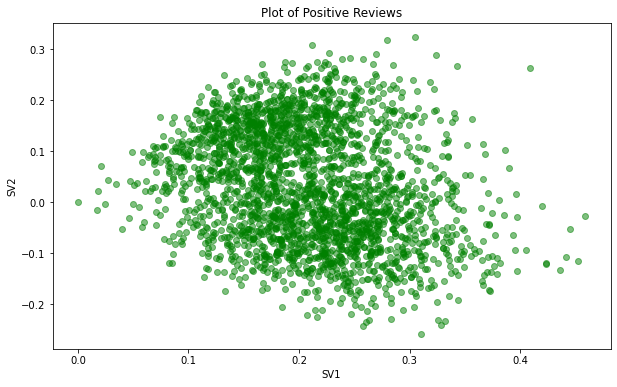

In [14]:
# util.plot_lsa(lsa_pos)
util.Image('img/reviews_pos.png')

<center style="font-size:12px;font-style:default;"><b>Figure 7. Scatter plot of positive reviews against in first and second singular vectors</b>

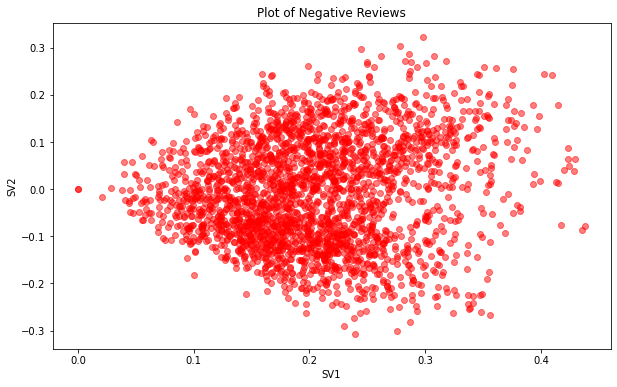

In [15]:
# util.plot_lsa(lsa_neg)
util.Image('img/reviews_neg.png')

<center style="font-size:12px;font-style:default;"><b>Figure 8. Scatter plot of negative reviews against in first and second singular vectors</b>

## 9. Results and Discussion

### 9.1 Number of Clusters

<p style='text-align: justify;'>Although the rule of thumb in selecting the number of clusters is identifying the elbow in the SSE distance plot, this was not apparent in either negative or positive reviews. The CH index peaked at k=2 and further declined as we increased k. As such, we had to rely on the remaining two measures to find the optimal k. </p>

<p style='text-align: justify;'>The Silhoutte coefficient and gap statistic plots had more promising behaviors as we increased k. Although still not as evident as we would like, both measures spiked at k=5 which suggested the optimal number of clusters. In focusing on these measures, we hoped we could find clusters that were 1) highly defined by their latent factors, and 2) clearly delineated by their separation.</p>


In [16]:
# res_pos = util.cluster_range(lsa_pos, KMeans(random_state=1337), 2, 11)

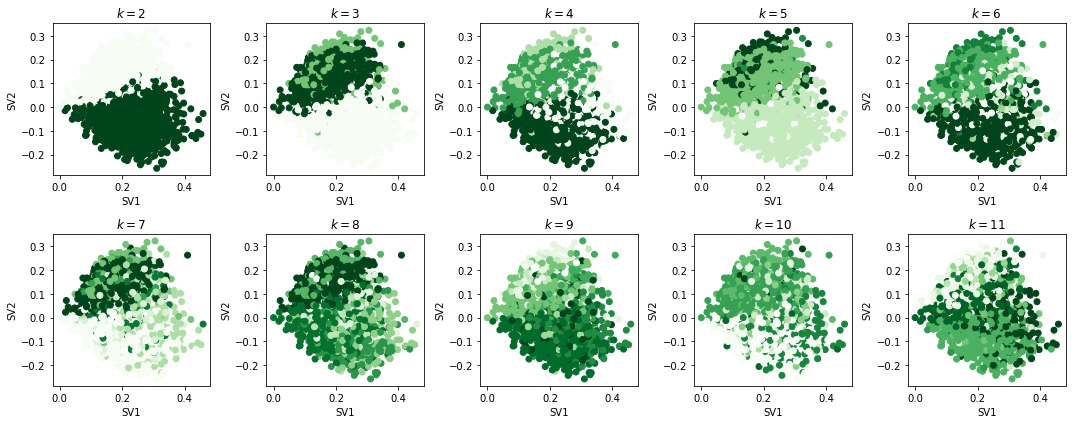

In [17]:
# util.plot_clusters(lsa_pos, res_pos)
util.Image('img/k_clusters_pos.png')

<center style="font-size:12px;font-style:default;"><b>Figure 9. Sample of clustering results for positive reviews.</b><br>Clusters are shown with increasing k values.

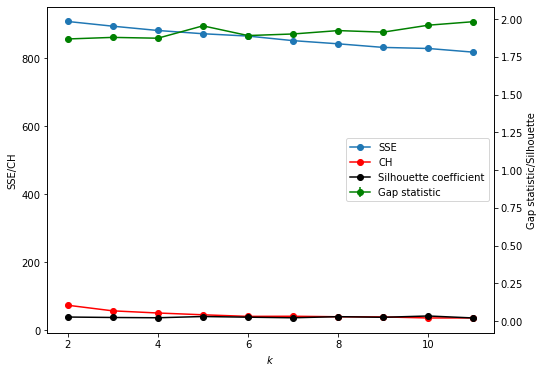

In [19]:
# util.plot_internal(res_pos['inertias'], res_pos['chs'], res_pos['scs'],
#                    res_pos['gss'], res_pos['gssds']);
util.Image('img/internal_validation_pos.png')

<center style="font-size:12px;font-style:default;"><b>Figure 10. Internal validation plot for positive reviews. </b><br>Metrics used were sum of squares distances (SSE), Calinski-Harabasz index (CH), Silhouette coefficient and gap statistic.

In [20]:
# res_neg = util.cluster_range(lsa_pos, KMeans(random_state=1337), 2, 11)

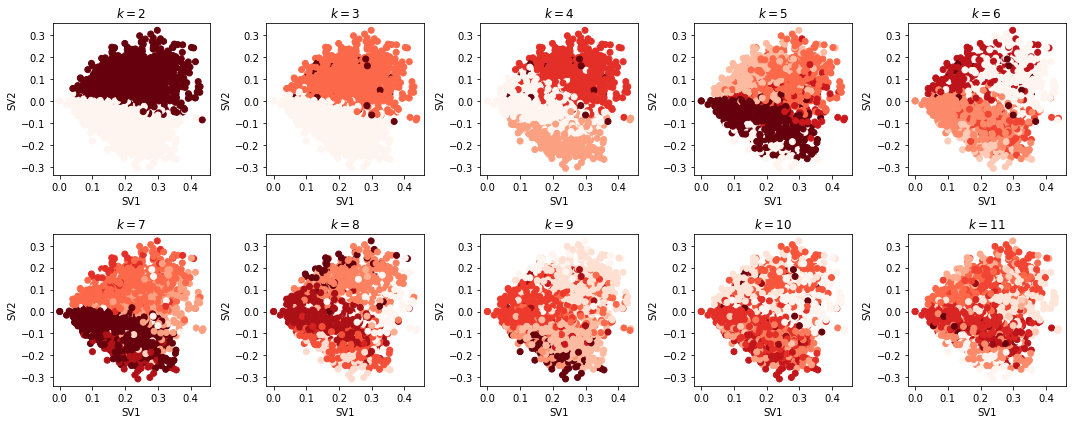

In [18]:
# util.plot_clusters(lsa_neg, res_neg)
util.Image('img/k_clusters_neg.png')

<center style="font-size:12px;font-style:default;"><b>Figure 11. Sample of clustering results for negative reviews.</b><br>Clusters are shown with increasing k values.

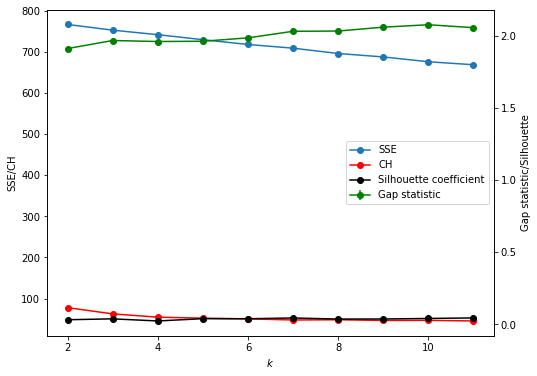

In [21]:
# util.plot_internal(res_pos['inertias'], res_pos['chs'], res_pos['scs'],
#                    res_pos['gss'], res_pos['gssds']);
util.Image('img/internal_validation_neg.png')

<center style="font-size:12px;font-style:default;"><b>Figure 12. Internal validation plot for negative reviews. </b><br>Metrics used were sum of squares distances (SSE), Calinski-Harabasz index (CH), Silhouette coefficient and gap statistic.

### 9.2 Positive Reviews

Plotting the positive reviews dataset again after applying five clusters we see the image below.

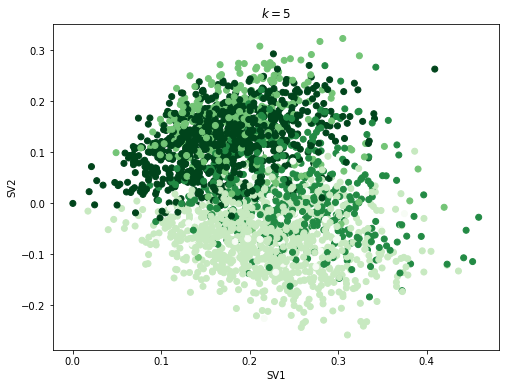

In [22]:
# util.plot_clustered(lsa_pos, kmeans_pos)
util.Image('img/clustered_pos.png')

<center style="font-size:12px;font-style:default;"><b>Figure 13. Final clustering of positive reviews using k=5 based on internal validation measures.</b>

Next we interpret using the word clouds for each of the clusters in the positive reviews set. 

In [24]:
# util.word_cloud(5, lsa_pos, 'corpus_pos.pkl')

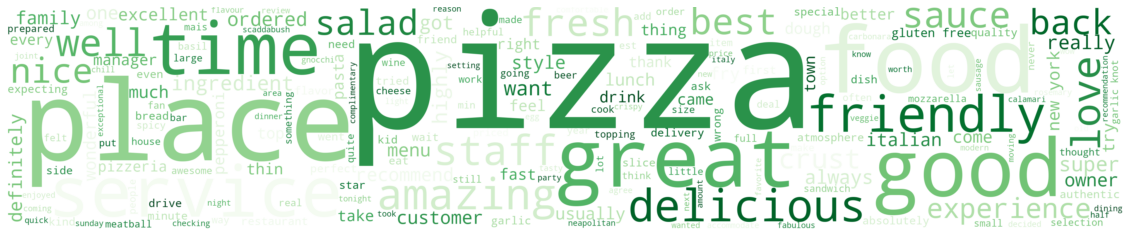

In [25]:
util.Image('img/cluster_pos_1.png')

<center style="font-size:12px;font-style:default;"><b>Figure 14. First positive cluster.</b><br> Topics are on pizzerias.

<p style='text-align: justify;'>The first cluster is evidently about pizza restaurants. Words such as “great”, “food”, “great”, and “place” describe a pizzeria that provides good-quality food and service. The physical restaurant is itself appealing. This also means that there are a lot of pizzerias registered on the website and tend to generally be a place that generates good reviews, given that this is a prominent cluster. Most of the words also refer to positive adjectives. It also includes “family” and “experience” which means pizzerias tend to be a place of good experiences specifically for families.

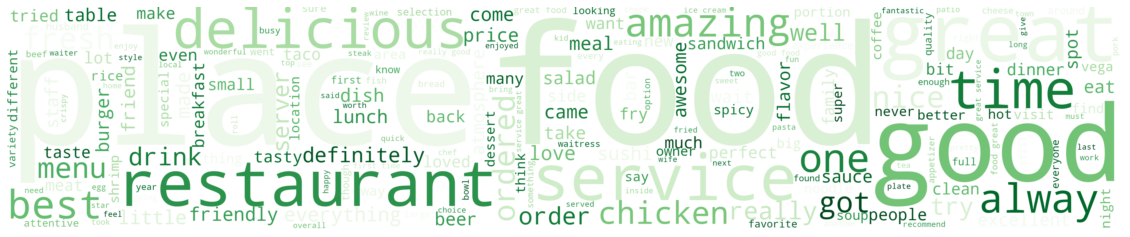

In [26]:
util.Image('img/cluster_pos_2.png')

<center style="font-size:12px;font-style:default;"><b>Figure 15. Second positive cluster.</b><br> Topics are on food and place.

<p style='text-align: justify;'>The second cluster is about restaurants in general since there is no major type of food. “Spicy” is also a popular flavor to be mentioned in good reviews. “Always” seems to be unique to this cluster which may suggest these reviews are from customers that regularly come back or service has been consistently good. This means that positive reviews can be a form of pledge to loyalty for the customers due to their positive experience.

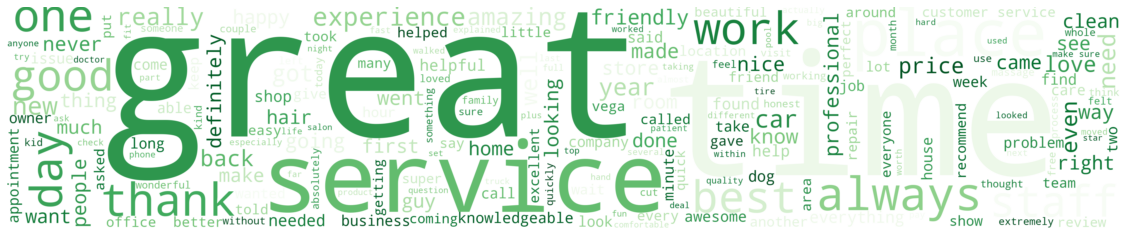

In [27]:
util.Image('img/cluster_pos_3.png')

<center style="font-size:12px;font-style:default;"><b>Figure 16. Third positive cluster.</b><br> Topics are on customer service.

<p style='text-align: justify;'>The third cluster pertains to general service-based businesses due to the lack of flavor, food and restaurant. We see several words that may be objects of praise, such as “service”, “time”, “place”, and “staff”. We see “thank” as a unique word for this cluster which may verify that the positive review is to a representative or to staff. This can be a great cluster to analyze. From the distribution of businesses on the Yelp website, restaurants take only about 50% of the number of businesses on the site [1]. 

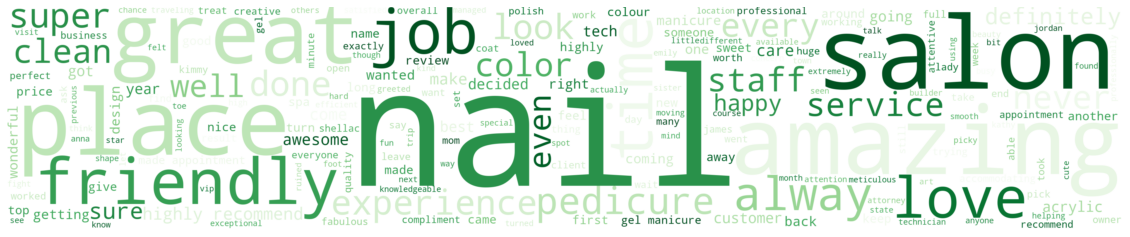

In [28]:
util.Image('img/cluster_pos_4.png')

<center style="font-size:12px;font-style:default;"><b>Figure 17. Fourth positive cluster.</b><br> Topics are on nail salons.

<p style='text-align: justify;'>The fourth cluster focuses on reviews specifically for nail salons which is also verified by the words “nail”, “salon”, and “pedicure”. In this cluster, the service is greatly praised with several positive adjectives (i.e. “friendly”, “great”, “amazing”, “love”). This also determines that nail salons are also a major business on the platform that generates positive reviews such as that of the pizzeria. This is a very service-oriented business and is also probably how they advertise and form connections with customers.

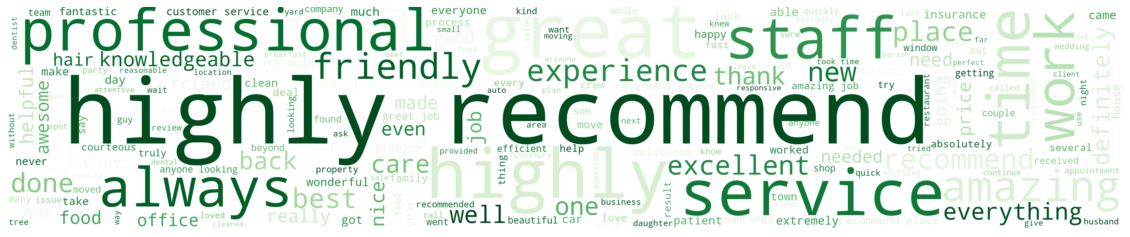

In [29]:
util.Image('img/cluster_pos_5.png')

<center style="font-size:12px;font-style:default;"><b>Figure 18. Fifth positive cluster.</b><br> Topics are recommendations.

<p style='text-align: justify;'>The last cluster revolves around recommendations but are focused on serviced-based businesses. Words such as “professional”, “staff”, “work”, “friendly”, and “experience” describe the quality of the service rendered by the business to the customer. We can also see that “highly recommended” is a phrase that is commonly used and these words commonly go together, given their similar size. This cluster represents reviews referring to a call to action for other customers. 

### 9.3 Negative Reviews

Plotting the negative reviews dataset again after applying five clusters we see the image below. Below it are the word clouds for each of the clusters in the negative reviews set and their interpretations.

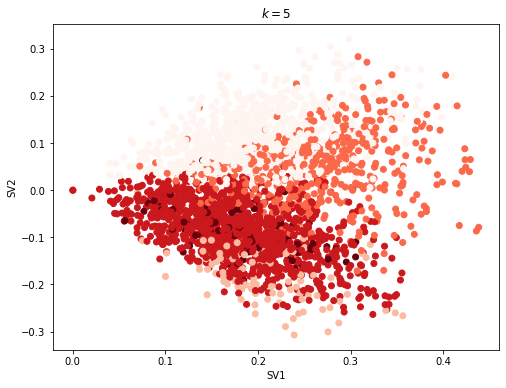

In [23]:
# util.plot_clustered(lsa_neg, kmeans_neg)
util.Image('img/clustered_neg.png')

<center style="font-size:12px;font-style:default;"><b>Figure 19. Final clustering of negative reviews using k=5 based on internal validation measures.</b>

In [30]:
# util.word_cloud(5, lsa_neg, 'corpus_neg.pkl')

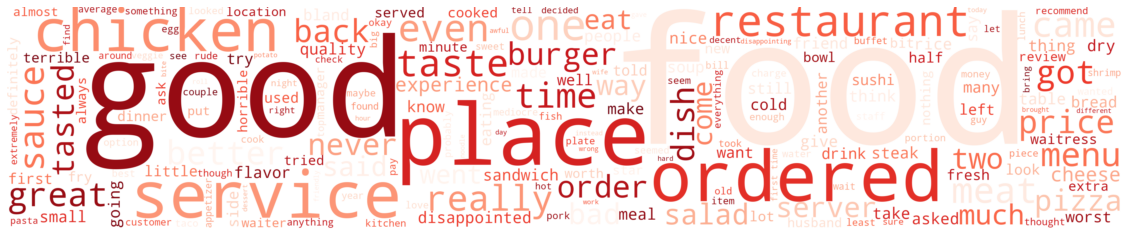

In [31]:
util.Image('img/cluster_neg_1.png')

<center style="font-size:12px;font-style:default;"><b>Figure 20. First negative cluster.</b><br> Topics are food quality.

<p style='text-align: justify;'>For the first cluster, the reviews revolve around restaurant businesses. Words such as “taste”, “menu”, and “price” are prominent. In these reviews, there could be complaints on the quality of the food or the price of food at the restaurant. 

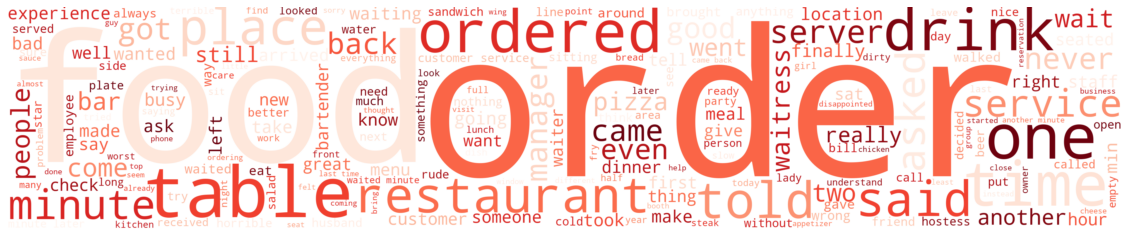

In [33]:
util.Image('img/cluster_neg_3.png')

<center style="font-size:12px;font-style:default;"><b>Figure 21. Second negative cluster.</b><br> Topics are food service.

<p style='text-align: justify;'>The second cluster looks into food service specifically. We see words such as “minute”, “server”, “service”, “time” and “waitress”. These relate specifically to the service of the food business, possibly the wait times or how the staff were acting in the restaurant.

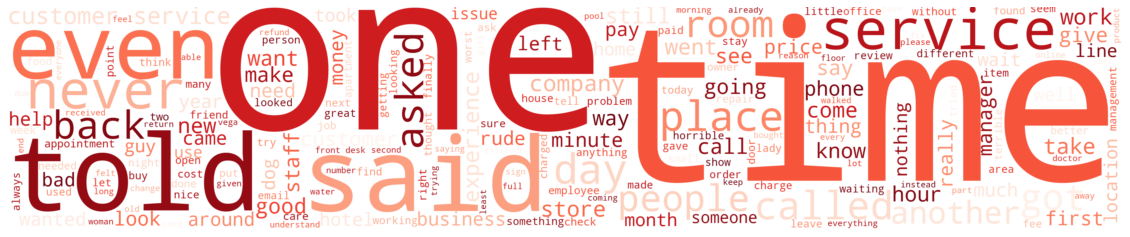

In [34]:
util.Image('img/cluster_neg_4.png')

<center style="font-size:12px;font-style:default;"><b>Figure 22. Third negative cluster.</b><br> Topics are general customer service.

<p style='text-align: justify;'>The third cluster has two dominant words, “one” and “time” which may suggest complaints on general customer service. This cluster does not revolve around a single particular business. These may suggest service commitments that were not met by the business. This is a possible pain point and will be touched on further.

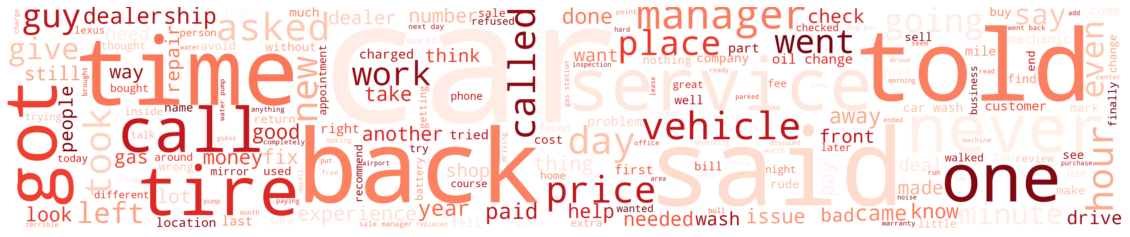

In [32]:
util.Image('img/cluster_neg_2.png')

<center style="font-size:12px;font-style:default;"><b>Figure 23. Fourth negative cluster.</b><br> Topics are on cars industry.

<p style='text-align: justify;'>In this cluster, we see “car” as the dominant word in this cluster. We believe this cluster focuses on car repair and maintenance. Based on the corpus, it can be inferred that a service representative may have told the customer that they can get their vehicle back in a certain time, which are also seen in the cloud as “back” and “time”. However, because this is a negative review, the obligation to finish repairs and return the vehicle may have been delayed. This is a possible customer pain point and will be further discussed.

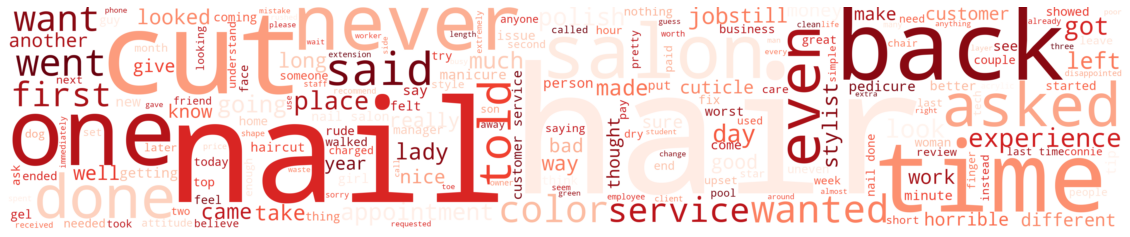

In [35]:
util.Image('img/cluster_neg_5.png')

<center style="font-size:12px;font-style:default;"><b>Figure 24. Fifth negative cluster.</b><br> Topics are on hair and nail salons.

<p style='text-align: justify;'>The last cluster highlights complaints in the nail and hair salon industry inferred by words such as “nail”, “hair”, and “salon”. As a service-oriented industry, they rely heavily on good reviews so this can be a possible point of improvement.

## 10. Conclusion

### 10.1 Cluster Comparisons

<p style='text-align: justify;'>Between the positive and negative reviews datasets, we actually see similarities between the clusters formed. Customer service, food quality and place of business are similar clusters and should always be a priority for the businesses especially if they rely on reviews for their business. 

<p style='text-align: justify;'>We can also see that increasing the number of clusters actually results in clustering reviews based on categories of businesses on Yelp such as food, cars and salons. This can be attributed to similar businesses being critiqued on the same features.


### 10.2 Customer Retention

<p style='text-align: justify;'>Based on clustering of positive reviews dataset, we can say that for customers to give good reviews to businesses, they should focus on customer service, food quality and even ambience. A great experience encourages positive reviews and even provides a call to action for other customers. These customer touch points should be taken care of to maximize its value in retaining old customers and creating new ones.

<p style='text-align: justify;'>Pizza is also a popular place to go to for a good experience so general recommendations on the app should skew towards pizzerias for a good time. This can be due to the fact that Yelp reviews are for businesses in the US and this is a popular food for Americans.


### 10.3 Customer Pain Points

<p style='text-align: justify;'>Based on the clustering of negative reviews dataset, it should be noted as well that customer service is the main customer pain point that drives them to leave a negative review. To avoid this, businesses should invest in better customer service such as training or even automated solutions for easier access.

<p style='text-align: justify;'>It is also important to note that the worst perpetrator for bad reviews is failure in commitment to service. If a business promises they will complete a service at a certain time, they should commit to it. Otherwise, they are more likely to post a negative review. This includes food service such as wait time to order and car repair where a specific time frame is expected. Again, since Yelp is for US businesses, pain points regarding cars would be numerous as this is their main mode of transport.


## 11. Recommendations

### 11.1 Applciations of the Study

<p style='text-align: justify;'>The study may be used as a tool to address critical issues in their operations that may not be apparent in their typical feedback channels (e.g. monthly sales figures, quarterly management KPI reviews, etc.). As such, further applications of the study could provide more reliable feedback to businesses. 

<p style='text-align: justify;'>It would be possible as well for Yelp to give this information to its businesses which would help them in customer touch points, thus boosting website traffic for Yelp.

<p style='text-align: justify;'>In addition, understanding the underlying components of meaningful customer reviews should provide a more transparent platform for site visitors or app users. We expect results of the study could improve user experience. This should in turn add incentive for customers to post their own reviews – either to support or counter the current store of reviews. 


### 11.2 Limitations and Possible Improvements

<p style='text-align: justify;'>A key weakness of our study has been to cast a very broad net on the data subset. Although we did limit our analysis to a single year and bisect it to positive and negative reviews, we did not further focus on a single category. As Yelp caters to a wide variety of businesses, the characteristics of customer reviews for restaurants may be totally different from a house contractor or nail salon. As such, this may explain the hundreds of topics to explain 90% of the variance explained for positive reviews. 

<p style='text-align: justify;'>Ideally, we use all factors to reach at least 90% of the variance explained from LSA to cluster the reviews. Further improvement could be the use of all positive and negative reviews. From there even more exploratory data analysis such as statistical testing of clusters and determining the top words of the most variance explained topics in each cluster could be done. This gives more interpretation to the topics from LSA. Going into specific topics would yield more insights to customer reviews for improvement.

<p style='text-align: justify;'>For future studies, it is recommended to check also for trends of topics over time. It is also recommended to perform clustering on the vectorized corpus with order in mind with the use of cosine similarity as the basis of clustering can also be done since this measure works best for text data. It would also be recommended to explore grouping businesses in Yelp by the types of reviews such as those found when increasing the number of clusters rather than a set list.


## References

1. Yelp, Inc. (2021, June 30). An Introduction to Yelp Metrics as of June 30, 2021. www.yelp-press.com. https://www.yelp-press.com/company/fast-facts/default.aspx

2. Vendasta. (n.d.). Two big reasons why reviews on review sites are kind of a big deal. www.vendasta.com. https://www.vendasta.com/blog/top-10-customer-review-websites/

3. Wright, D. (2018, November 1). Managing Impromptu Diners Just Got Easier with Two New Yelp Waitlist Features. www.yelp.com. https://blog.yelp.com/2018/11/managing-impromptu-diners-just-got-easier-with-two-new-yelp-nowait-features

4. Yelp, Inc. (2014, May 31). Yelp Reservations: New Free Tool for Businesses Gives Diners Even More Options When Booking Online. www.yelp.com. https://blog.yelp.com/2014/05/yelp-reservations-new-free-tool-for-businesses-gives-diners-even-more-options-when-booking-online

5. Shiran, A. (2020, May 4). Yelp Launches an All New Modernized and Enhanced Experience for Business Owners. www.yelp.com. https://blog.yelp.com/2020/05/yelp-launches-an-all-new-modernized-and-enhanced-experience-for-business-owners

6. Scikit-learn. (n.d). sklearn.decomposition.TruncatedSVD. www.scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
